In [1]:
import os,sys,inspect
import random

import renderer


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import util

import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

import ipywidgets as widgets
from ipywidgets.widgets.interaction import interact

In [14]:
sigma_t = 8.0
albedo = 0.9
size = 2.0
pointsource_center = np.array([1.0, 1.0, 1.0])

def grosjean(r, sigma_t, albedo):
    sigma_a = (1.0-albedo)*sigma_t
    sigma_s = albedo*sigma_t
    ss = np.exp(-sigma_t*r)/(4.0*np.pi*r*r)
    tmp = sigma_a+sigma_s
    D = (2.0*sigma_a+sigma_s)/(3.0*tmp*tmp)
    ms = 3.0*sigma_s*sigma_t*np.exp(-np.sqrt(sigma_a/D)*r)/(4.0*np.pi*(2.0*sigma_a+sigma_s)*r)
    return ss+ms
    #return ms

def grosjean_ss(r, sigma_t, albedo):
    sigma_a = (1.0-albedo)*sigma_t
    sigma_s = albedo*sigma_t
    ss = np.exp(-sigma_t*r)/(4.0*np.pi*r*r)
    tmp = sigma_a+sigma_s
    D = (2.0*sigma_a+sigma_s)/(3.0*tmp*tmp)
    ms = 3.0*sigma_s*sigma_t*np.exp(-np.sqrt(sigma_a/D)*r)/(4.0*np.pi*(2.0*sigma_a+sigma_s)*r)
    #return ss+ms
    return ss

def cda_org( r, sigma_t, albedo ):
    sigma_a = (1.0-albedo)*sigma_t
    sigma_tr = np.sqrt(3.0*sigma_a*sigma_t)
    return 3.0*sigma_t*np.exp(-sigma_tr*r)/(4.0*np.pi*r)

In [15]:
pns_cda = renderer.load_pnsolution( "C:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_cda5.pns" )
pns_cda_old = renderer.load_pnsolution( "C:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_cda_old.pns" )
pns_cda_new = renderer.load_pnsolution( "C:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_cda_new.pns" )

pns_p1_old = renderer.load_pnsolution( "c:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_p1_old.pns" )
pns_p1_new = renderer.load_pnsolution( "c:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_p1_new.pns" )


pns_p2_old = renderer.load_pnsolution( "c:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_p2_old.pns" )
pns_p2_new = renderer.load_pnsolution( "c:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_p2_new.pns" )

#pns_p5 = renderer.load_pnsolution( "c:/projects/epfl/epfl17/python/pnsolver/results/pointsource/pointsource_p5_4_ms.pns" )

r_list = np.linspace(1.0e-2, size*0.5, 100)
fluence_grosjean = [ grosjean(r, sigma_t, albedo) for r in r_list ]
fluence_cda = [ cda_org(r, sigma_t, albedo) for r in r_list ]

fluence_cda_old = np.array([pns_cda_old.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])
fluence_cda_new = np.array([pns_cda_new.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])

#fluence_p1_numerical = np.array([pns_p1.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])
fluence_p1_old = np.array([pns_p1_old.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])
fluence_p1_new = np.array([pns_p1_new.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])

fluence_p2_old = np.array([pns_p2_old.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])
fluence_p2_new = np.array([pns_p2_new.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])

#fluence_p5_numerical = np.array([pns_p5.evalCoefficient(pointsource_center+np.array([r, 0.0, 0.0]), 0) for r in r_list])

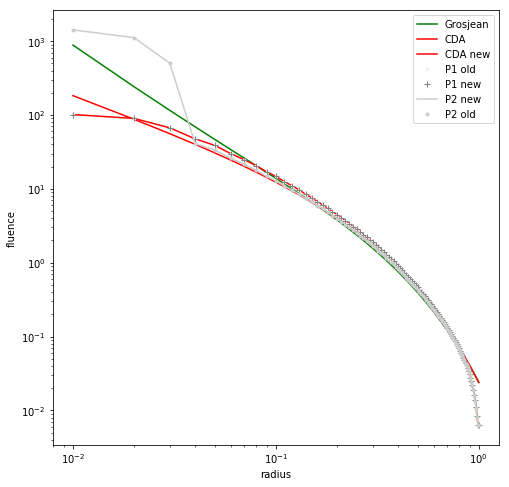

In [16]:
fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(111)
plt.loglog(r_list, fluence_grosjean, label="Grosjean", color="g")
plt.loglog(r_list, fluence_cda, label="CDA", color="r")
#plt.loglog(r_list, fluence_cda_old, label="CDA old", color="r")
plt.loglog(r_list, fluence_cda_new, label="CDA new", color="r")
#plt.loglog(r_list, fluence_cda_numerical, label="CDA numerical", marker=".", linestyle=" " )

#plt.loglog(r_list, fluence_p1_numerical, label="P1", marker=" ", linestyle="-", color=".95" )
plt.loglog(r_list, fluence_p1_old, label="P1 old", marker=".", linestyle=" ", color=".95" )
plt.loglog(r_list, fluence_p1_new, label="P1 new", marker="+", linestyle=" ", color=".5" )
#plt.loglog(r_list, fluence_p1_numerical_check, label="P1 check", marker=".", linestyle=" ", color=".95" )


plt.loglog(r_list, fluence_p2_new, label="P2 new", marker=" ", linestyle="-", color=".8" )
plt.loglog(r_list, fluence_p2_old, label="P2 old", marker=".", linestyle=" ", color=".8" )

#plt.loglog(r_list, fluence_p3_numerical, label="P3", marker=" ", linestyle="-", color=".6" )
#plt.loglog(r_list, fluence_p4_numerical, label="P4", marker=" ", linestyle="-", color=".4" )
#plt.loglog(r_list, fluence_p5_numerical, label="P5", marker=" ", linestyle="-", color=".2" )
plt.xlabel('radius')
plt.ylabel('fluence')
plt.legend()
plt.show()